In [1118]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [1119]:
train=pd.read_csv("C:/Users/hp/Desktop/Analytics Vidhya/LearnX Sales Forecasting/train.csv")

In [1120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
ID                    512087 non-null int64
Day_No                512087 non-null int64
Course_ID             512087 non-null int64
Course_Domain         512087 non-null object
Course_Type           512087 non-null object
Short_Promotion       512087 non-null int64
Public_Holiday        512087 non-null int64
Long_Promotion        512087 non-null int64
User_Traffic          512087 non-null int64
Competition_Metric    510323 non-null float64
Sales                 512087 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [1121]:
train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [1122]:
train.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [1123]:
X=train.iloc[0:512087,0:10]

In [1124]:
X.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric
0,1,1,1,Development,Course,0,1,1,11004,0.007
1,2,2,1,Development,Course,0,0,1,13650,0.007
2,3,3,1,Development,Course,0,0,1,11655,0.007
3,4,4,1,Development,Course,0,0,1,12054,0.007
4,5,5,1,Development,Course,0,0,1,6804,0.007


In [1125]:
Y=train.loc[:,'Sales']

In [1126]:
Y.head()

0    81
1    79
2    75
3    80
4    41
Name: Sales, dtype: int64

In [1127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [1128]:
x_train.Course_ID.value_counts()

220    748
414    740
198    739
559    737
391    736
445    734
446    733
108    732
494    731
236    731
496    731
528    730
454    730
143    730
124    729
506    728
434    728
168    728
308    727
134    727
557    727
411    727
509    727
538    727
393    726
48     726
67     726
358    726
467    726
84     726
      ... 
33     554
531    553
435    553
329    553
287    552
404    552
121    552
349    551
499    551
488    550
212    550
474    550
376    550
327    550
128    549
131    549
398    548
514    548
41     548
158    547
403    547
401    547
325    547
524    546
371    546
592    546
545    545
511    544
169    540
87     538
Name: Course_ID, Length: 600, dtype: int64

In [1129]:
x_train.Course_Domain.value_counts()

Development             211635
Software Marketing      132788
Finance & Accounting     61671
Business                  3575
Name: Course_Domain, dtype: int64

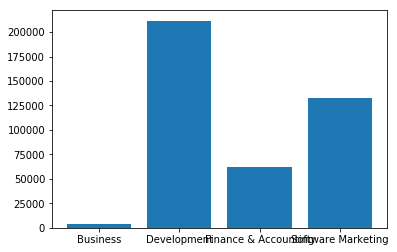

In [1130]:
plt.bar(['Development','Software Marketing','Finance & Accounting','Business'],[211635,132788,61671,3575])
plt.show()

In [1131]:
x_train.Course_Type.value_counts()

Course     210083
Program    198148
Degree       1438
Name: Course_Type, dtype: int64

In [1132]:
x_train.Short_Promotion.value_counts()

0    253950
1    155719
Name: Short_Promotion, dtype: int64

In [1133]:
x_train.Public_Holiday.value_counts()

0    396719
1     12950
Name: Public_Holiday, dtype: int64

In [1134]:
x_train.Long_Promotion.value_counts()

0    209522
1    200147
Name: Long_Promotion, dtype: int64

In [1135]:
x_train.Competition_Metric.value_counts()

0.001    16626
0.003    14986
0.002    13138
0.004    12645
0.009     9615
0.007     8282
0.000     7032
0.006     6807
0.021     6471
0.005     6217
0.030     6179
0.014     6146
0.035     5660
0.044     5455
0.015     5385
0.018     5355
0.013     5223
0.016     5177
0.008     5034
0.022     4943
0.028     4836
0.027     4810
0.051     4796
0.024     4187
0.023     4124
0.012     4113
0.011     4079
0.032     4056
0.036     3808
0.047     3563
         ...  
0.114      698
0.185      697
0.159      697
0.637      696
0.267      695
0.465      695
0.123      694
0.133      694
0.510      694
0.066      693
0.197      692
0.297      691
0.383      689
0.316      689
0.259      688
0.178      686
0.057      685
0.344      684
0.200      678
0.419      666
0.096      577
0.166      566
0.171      564
0.326      561
0.218      561
0.263      559
0.097      554
0.158      554
0.083      548
0.103      547
Name: Competition_Metric, Length: 196, dtype: int64

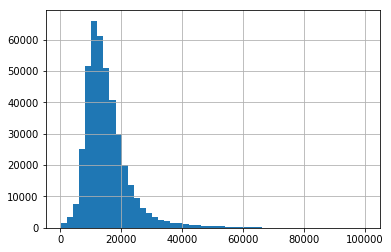

In [1136]:
x_train['User_Traffic'].hist(bins=50)

In [1137]:
import scipy.stats as st
train.corr(method='pearson')

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
ID,1.000000,0.001052,0.999996,-0.000005,0.001274,-0.039570,0.033604,-0.007431,0.017037
Day_No,0.001052,1.000000,-0.000506,0.014645,0.019112,-0.020204,0.021511,0.003229,0.060012
Course_ID,0.999996,-0.000506,1.000000,-0.000027,0.001242,-0.039605,0.033520,-0.007385,0.016894
Short_Promotion,-0.000005,0.014645,-0.000027,1.000000,-0.018770,-0.001149,0.198785,0.000182,0.367762
Public_Holiday,0.001274,0.019112,0.001242,-0.018770,1.000000,0.008319,-0.108305,-0.000491,-0.135052
Long_Promotion,-0.039570,-0.020204,-0.039605,-0.001149,0.008319,1.000000,-0.204289,-0.119382,-0.109455
User_Traffic,0.033604,0.021511,0.033520,0.198785,-0.108305,-0.204289,1.000000,-0.148775,0.829741
Competition_Metric,-0.007431,0.003229,-0.007385,0.000182,-0.000491,-0.119382,-0.148775,1.000000,-0.022085
Sales,0.017037,0.060012,0.016894,0.367762,-0.135052,-0.109455,0.829741,-0.022085,1.000000


In [1138]:
from sklearn.linear_model import LinearRegression

In [1139]:
df1=pd.DataFrame(x_train,columns=['ID','User_Traffic'])

In [1140]:
df1.head()

,ID,User_Traffic
316426,338567,15876
120150,128551,13965
211809,226630,14910
299848,320849,30513
226971,242872,10920


In [1141]:
model1=LinearRegression()
model1.fit(df1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1142]:
model1.score(df1,y_train)

0.6882013730582847

In [1143]:
import seaborn as sns
%matplotlib inline

In [1144]:
tot_sale=np.sum(train['Sales'])
print(tot_sale)

61873897


In [1145]:
train.loc[train["Short_Promotion"]==0,'Sales'].sum()/tot_sale

0.5394431192850193

In [1146]:
train.loc[train["Short_Promotion"]==1,'Sales'].sum()/tot_sale

0.4605568807149807

In [1147]:
train.loc[train["Long_Promotion"]==0,'Sales'].sum()/tot_sale

0.5356459768486863

In [1148]:
train.loc[train["Long_Promotion"]==1,'Sales'].sum()/tot_sale

0.4643540231513137

In [1149]:
train.loc[train["Public_Holiday"]==0,'Sales'].sum()/tot_sale

0.9789951649562335

In [1150]:
train.loc[train["Public_Holiday"]==1,'Sales'].sum()/tot_sale

0.021004835043766518

In [1151]:
train.loc[train["Course_Domain"]=='Development','Sales'].sum()/tot_sale

0.5126512719895435

In [1152]:
train.loc[train["Course_Domain"]=='Software Marketing','Sales'].sum()/tot_sale

0.31866560788954346

In [1153]:
train.loc[train["Course_Domain"]=='Business','Sales'].sum()/tot_sale

0.013299226974502672

In [1154]:
train.loc[train["Course_Domain"]=='Finance & Accounting','Sales'].sum()/tot_sale

0.15538389314641035

In [1155]:
train.loc[train["Course_Type"]=='Course','Sales'].sum()/tot_sale

0.48159989017662813

In [1156]:
train.loc[train["Course_Type"]=='Program','Sales'].sum()/tot_sale

0.5131525980980316

In [1157]:
train.loc[train["Course_Type"]=='Degree','Sales'].sum()/tot_sale

0.005247511725340332

In [1158]:
df2=pd.DataFrame(x_train,columns=['ID','Course_Domain','Course_Type','Public_Holiday','Short_Promotion','Long_Promotion','User_Traffic'])
df2.head()

,ID,Course_Domain,Course_Type,Public_Holiday,Short_Promotion,Long_Promotion,User_Traffic
316426,338567,Development,Course,0,0,0,15876
120150,128551,Development,Course,0,0,0,13965
211809,226630,Development,Course,0,1,1,14910
299848,320849,Software Marketing,Course,0,1,0,30513
226971,242872,Finance & Accounting,Course,0,0,0,10920


In [1159]:
df3=pd.DataFrame(x_test,columns=['ID','Course_Domain','Course_Type','Public_Holiday','Short_Promotion','Long_Promotion','User_Traffic'])


In [1160]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [1161]:
df2.iloc[:,1]=le.fit_transform(df2.iloc[:,1])

In [1162]:
df3.iloc[:,1]=le.fit_transform(df3.iloc[:,1])

In [1163]:
df2.iloc[:,2]=le.fit_transform(df2.iloc[:,2])

In [1164]:
df3.iloc[:,2]=le.fit_transform(df3.iloc[:,2])

In [1165]:
df2.iloc[:,3]=le.fit_transform(df2.iloc[:,3])

In [1166]:
df3.iloc[:,3]=le.fit_transform(df3.iloc[:,3])

In [1167]:
df2.iloc[:,4]=le.fit_transform(df2.iloc[:,4])

In [1168]:
df3.iloc[:,4]=le.fit_transform(df3.iloc[:,4])

In [1169]:
df2.iloc[:,5]=le.fit_transform(df2.iloc[:,5])

In [1170]:
df3.iloc[:,5]=le.fit_transform(df3.iloc[:,5])

In [1171]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe1=OneHotEncoder()

In [1172]:
ohe=OneHotEncoder(categorical_features=[1])
df2=ohe.fit_transform(df2).toarray()

In [1173]:
print(df2[0:5,:])

[[0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 3.38567e+05 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.58760e+04]
 [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.28551e+05 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.39650e+04]
 [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 2.26630e+05 0.00000e+00
  0.00000e+00 1.00000e+00 1.00000e+00 1.49100e+04]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 3.20849e+05 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 3.05130e+04]
 [0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 2.42872e+05 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.09200e+04]]


In [1174]:
ohe1=OneHotEncoder(categorical_features=[1])
df3=ohe1.fit_transform(df3).toarray()

In [1175]:
ohe=OneHotEncoder(categorical_features=[5])
df2=ohe.fit_transform(df2).toarray()

In [1176]:
print(df2[0:5,:])

[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 3.38567e+05 0.00000e+00 0.00000e+00 0.00000e+00 1.58760e+04]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.28551e+05 0.00000e+00 0.00000e+00 0.00000e+00 1.39650e+04]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 2.26630e+05 0.00000e+00 1.00000e+00 1.00000e+00 1.49100e+04]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 3.20849e+05 0.00000e+00 1.00000e+00 0.00000e+00 3.05130e+04]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 2.42872e+05 0.00000e+00 0.00000e+00 0.00000e+00 1.09200e+04]]


In [1177]:
ohe1=OneHotEncoder(categorical_features=[5])
df3=ohe1.fit_transform(df3).toarray()

In [1178]:
ohe=OneHotEncoder(categorical_features=[8])
df2=ohe.fit_transform(df2).toarray()

In [1179]:
print(df2[0:5,:])

[[1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 3.38567e+05 0.00000e+00 0.00000e+00
  1.58760e+04]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.28551e+05 0.00000e+00 0.00000e+00
  1.39650e+04]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 2.26630e+05 1.00000e+00 1.00000e+00
  1.49100e+04]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 3.20849e+05 1.00000e+00 0.00000e+00
  3.05130e+04]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 2.42872e+05 0.00000e+00 0.00000e+00
  1.09200e+04]]


In [1180]:
ohe1=OneHotEncoder(categorical_features=[8])
df3=ohe1.fit_transform(df3).toarray()

In [1181]:
ohe=OneHotEncoder(categorical_features=[10])
df2=ohe.fit_transform(df2).toarray()

In [1182]:
print(df2[0:5,:])

[[1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 3.38567e+05
  0.00000e+00 1.58760e+04]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.28551e+05
  0.00000e+00 1.39650e+04]
 [0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 2.26630e+05
  1.00000e+00 1.49100e+04]
 [0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 3.20849e+05
  0.00000e+00 3.05130e+04]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 2.42872e+05
  0.00000e+00 1.09200e+04]]


In [1183]:
ohe1=OneHotEncoder(categorical_features=[10])
df3=ohe1.fit_transform(df3).toarray()

In [1184]:
ohe=OneHotEncoder(categorical_features=[12])
df2=ohe.fit_transform(df2).toarray()

In [1185]:
print(df2[0:5,:])

[[1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 3.38567e+05 1.58760e+04]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.28551e+05 1.39650e+04]
 [0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 2.26630e+05 1.49100e+04]
 [1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 3.20849e+05 3.05130e+04]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 2.42872e+05 1.09200e+04]]


In [1186]:
ohe1=OneHotEncoder(categorical_features=[12])
df3=ohe1.fit_transform(df3).toarray()

In [1187]:
model1.fit(df2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1188]:
model1.score(df2,y_train)

0.8237523820998237

In [1189]:
predicted1=model1.predict(df2)

In [1190]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [1191]:
rmse1=sqrt(mean_squared_error(y_train,predicted1))
print(rmse1)

22.810257809165012


In [1192]:
import xgboost as xgb

In [1193]:
model2=xgb.XGBRegressor(learning_rate=1)

In [1194]:
model2.fit(df2,y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=1, max_delta_step=0, max_depth=3, min_child_weight=1,
       missing=None, n_estimators=100, nthread=-1, objective='reg:linear',
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)

In [1195]:
model2.score(df2,y_train)

0.9351750483877957

In [1196]:
model2.score(df3,y_test)

0.9338592970931312

In [1197]:
predicted2=model2.predict(df2)

In [1242]:
print(predicted2)

[112.90566   98.18257  184.84834  ...  81.42074   53.601147  86.22911 ]


In [1198]:
df5=pd.DataFrame({'Actual':y_train,'Predicted':predicted2})
df5.head()


,Actual,Predicted
316426,143,112.905663
120150,112,98.182571
211809,187,184.848343
299848,219,235.536896
226971,91,95.626022


In [1199]:
rmse2=sqrt(mean_squared_error(y_train,predicted2))
print(rmse2)

13.83374183146258


In [1200]:
predicted3=model2.predict(df3)

In [1201]:
rmse3=sqrt(mean_squared_error(y_test,predicted3))
print(rmse3)

14.001164759785377


# without user_traffic feature

In [1202]:
df4=pd.DataFrame(x_train,columns=['ID','Course_Domain','Course_Type','Public_Holiday','Short_Promotion','Long_Promotion'])
df4.head()

,ID,Course_Domain,Course_Type,Public_Holiday,Short_Promotion,Long_Promotion
316426,338567,Development,Course,0,0,0
120150,128551,Development,Course,0,0,0
211809,226630,Development,Course,0,1,1
299848,320849,Software Marketing,Course,0,1,0
226971,242872,Finance & Accounting,Course,0,0,0


In [1203]:
df4.iloc[:,1]=le.fit_transform(df4.iloc[:,1])

In [1204]:
df4.iloc[:,2]=le.fit_transform(df4.iloc[:,2])

In [1205]:
df4.iloc[:,3]=le.fit_transform(df4.iloc[:,3])

In [1206]:
df4.iloc[:,4]=le.fit_transform(df4.iloc[:,4])

In [1207]:
df4.iloc[:,5]=le.fit_transform(df4.iloc[:,5])

In [1208]:
ohe4=OneHotEncoder()

In [1209]:
ohe4=OneHotEncoder(categorical_features=[1])
df4=ohe4.fit_transform(df4).toarray()

In [1210]:
ohe4=OneHotEncoder(categorical_features=[5])
df4=ohe4.fit_transform(df4).toarray()

In [1211]:
ohe4=OneHotEncoder(categorical_features=[8])
df4=ohe4.fit_transform(df4).toarray()

In [1212]:
ohe4=OneHotEncoder(categorical_features=[10])
df4=ohe4.fit_transform(df4).toarray()

In [1213]:
ohe4=OneHotEncoder(categorical_features=[12])
df4=ohe4.fit_transform(df4).toarray()

In [1214]:
print(df4[0:5,:])

[[1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 3.38567e+05]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.28551e+05]
 [0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 2.26630e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 3.20849e+05]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 2.42872e+05]]


In [1239]:
mod_df4=pd.DataFrame(df4)
mod_df4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,338567.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,128551.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,226630.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,320849.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,242872.0


In [1216]:
model2.fit(mod_df4,y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=1, max_delta_step=0, max_depth=3, min_child_weight=1,
       missing=None, n_estimators=100, nthread=-1, objective='reg:linear',
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)

In [1217]:
model2.score(mod_df4,y_train)

0.705848807639901

# end user_traffic feature

In [1218]:
test=pd.read_csv("C:/Users/hp/Desktop/Analytics Vidhya/LearnX Sales Forecasting/test.csv")

In [1219]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [1220]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 9 columns):
ID                    36000 non-null int64
Day_No                36000 non-null int64
Course_ID             36000 non-null int64
Course_Domain         36000 non-null object
Course_Type           36000 non-null object
Short_Promotion       36000 non-null int64
Public_Holiday        36000 non-null int64
Long_Promotion        36000 non-null int64
Competition_Metric    35880 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.5+ MB


In [1221]:
test_df=pd.DataFrame(test,columns=['ID','Course_Domain','Course_Type','Public_Holiday','Short_Promotion','Long_Promotion'])
test_df.head()

,ID,Course_Domain,Course_Type,Public_Holiday,Short_Promotion,Long_Promotion
0,883,Development,Course,0,1,1
1,884,Development,Course,0,1,1
2,885,Development,Course,0,1,1
3,886,Development,Course,0,1,1
4,887,Development,Course,0,0,1


In [1222]:
test_df.iloc[:,1]=le.fit_transform(test_df.iloc[:,1])

In [1223]:
test_df.iloc[:,2]=le.fit_transform(test_df.iloc[:,2])

In [1224]:
test_df.iloc[:,3]=le.fit_transform(test_df.iloc[:,3])

In [1225]:
test_df.iloc[:,4]=le.fit_transform(test_df.iloc[:,4])

In [1226]:
test_df.iloc[:,5]=le.fit_transform(test_df.iloc[:,5])

In [1227]:
ohe2=OneHotEncoder()

In [1228]:
ohe2=OneHotEncoder(categorical_features=[1])
test_df=ohe2.fit_transform(test_df).toarray()

In [1229]:
ohe2=OneHotEncoder(categorical_features=[5])
test_df=ohe2.fit_transform(test_df).toarray()

In [1230]:
ohe2=OneHotEncoder(categorical_features=[8])
test_df=ohe2.fit_transform(test_df).toarray()

In [1231]:
ohe2=OneHotEncoder(categorical_features=[10])
test_df=ohe2.fit_transform(test_df).toarray()

In [1232]:
ohe2=OneHotEncoder(categorical_features=[12])
test_df=ohe2.fit_transform(test_df).toarray()

In [1233]:
print(test_df[0:5,:])

[[  0.   1.   0.   1.   1.   0.   1.   0.   0.   0.   1.   0.   0. 883.]
 [  0.   1.   0.   1.   1.   0.   1.   0.   0.   0.   1.   0.   0. 884.]
 [  0.   1.   0.   1.   1.   0.   1.   0.   0.   0.   1.   0.   0. 885.]
 [  0.   1.   0.   1.   1.   0.   1.   0.   0.   0.   1.   0.   0. 886.]
 [  0.   1.   1.   0.   1.   0.   1.   0.   0.   0.   1.   0.   0. 887.]]


In [1234]:
test_df1=pd.DataFrame(test_df)

In [1235]:
test_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,883.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,884.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,885.0
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,886.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,887.0


In [1236]:
result=model2.predict(test_df1)

In [1237]:
print(result)

[114.43576 114.43576 114.43576 ... 142.10185 142.10185 142.10185]


In [1240]:
sub_sol=pd.DataFrame(result)

In [1241]:
sub_sol.head()

,0
0,114.435760
1,114.435760
2,114.435760
3,114.435760
4,67.595436


In [1243]:
fin_sol=pd.concat([pd.DataFrame(test['ID']),sub_sol],axis=1)

In [1245]:
fin_sol.head()

,ID,0
0,883,114.435760
1,884,114.435760
2,885,114.435760
3,886,114.435760
4,887,67.595436


In [1244]:
fin_sol

,ID,0
0,883,114.435760
1,884,114.435760
2,885,114.435760
3,886,114.435760
4,887,67.595436
5,888,67.595436
6,889,67.595436
7,890,67.595436
8,891,67.595436
9,892,67.595436


In [1249]:
export_excel = fin_sol.to_excel (r'C:\Users\hp\Desktop\Analytics Vidhya\LearnX Sales Forecasting\my_submission1.xlsx', index = None, header=True)
#Don't forget to add '.xlsx' at the end of the path
# online convert xls into csv